# Initialisation

In [1]:
# Librairies pour le traitement des données
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.machine_learning_common_functions import *
from my_functions.pca_functions import *

%matplotlib inline

low_memory=False # faible mémoire vive (RAM) pour gérer la lecture de gros fichiers

In [2]:
# Chargement des Data Sets
df15 = pd.read_csv('2015-building-energy-benchmarking.csv', low_memory=low_memory)
df16 = pd.read_csv('2016-building-energy-benchmarking.csv', low_memory=low_memory)

Le data set contient :
	- 3340 lignes et 47 colonnes.
	- 26512 valeurs manquantes, ce qui représente 16.89 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
2979,27597,2015,SPS-District K-12,K-12 School,NORTHGATE ELEMENTARY SCHOOL (SPS-DISTRICT),6411600312,"{'latitude': '47.71428453', 'longitude': '-122...",5,NORTHWEST,1956,1,1.0,45174,0,45174,K-12 School,K-12 School,45174.0,NaN,NaN,NaN,NaN,NaN,88.0,41.2,51.6,74.7,87.6,1860084.0,2331607.0,0.0,199497.0,680712.0,11794.0,1179400.0,0.0,67.38,1.43,Yes,NaN,Compliant,NaN,122.0,46.0,1.0,33.0,19582
1465,21852,2015,Multifamily LR (1-4),Low-Rise Multifamily,EMBASSY THE CONDOMINIUM,2329200000,"{'latitude': '47.64088835', 'longitude': '-122...",3,EAST,1985,1,3.0,45235,38,45197,Multifamily Housing,Multifamily Housing,45235.0,NaN,NaN,NaN,NaN,NaN,65.0,21.2,23.5,66.6,73.9,959183.0,1064693.0,0.0,281121.0,959223.0,0.0,0.0,0.0,6.69,0.06,No,NaN,Compliant,NaN,NaN,36.0,NaN,4.0,18376


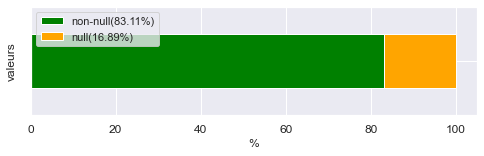

In [3]:
# Vérification de la structure du Data Set
verifier_taille(df15)
afficher_echantillon(df15)

Le data set contient :
	- 3376 lignes et 46 colonnes.
	- 19952 valeurs manquantes, ce qui représente 12.85 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
294,424,2016,NonResidential,Large Office,PARK PLACE OFFICE BLDG (ID424),1200 6th Avenue,Seattle,WA,98101.0,1976700185,7,DOWNTOWN,47.60909,-122.33202,1971,1.0,21,456304,93204,363100,"Office, Parking",Office,342952.0,Parking,106466.0,NaN,NaN,NaN,74.0,56.599998,59.500000,177.600006,187.000000,1.939732e+07,2.042125e+07,0.0,5.685030e+06,19397322.0,0.000000,0.0,False,NaN,Compliant,NaN,135.23,0.30
1136,21057,2016,NonResidential,Small- and Mid-Sized Office,Fremont Space,600 N. 36th Street,Seattle,WA,98103.0,1972201005,6,LAKE UNION,47.65178,-122.35100,2006,1.0,4,39926,12400,27526,"Multifamily Housing, Office, Parking, Retail S...",Office,24335.0,Parking,12400.0,Retail Store,2575.0,NaN,NaN,36.700001,37.700001,103.099998,105.800003,1.010968e+06,1.039085e+06,0.0,2.490192e+05,849654.0,1613.140015,161314.0,False,NaN,Compliant,NaN,14.49,0.36


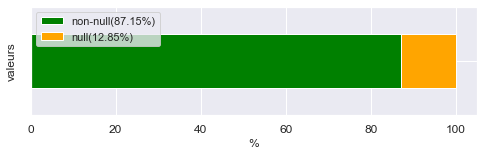

In [4]:
# Vérification de la structure du Data Set
verifier_taille(df16)
afficher_echantillon(df16)

In [5]:
nans = nan_cols(df15, 80)
nans # Affichage des colonnes trouvées

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,ThirdLargestPropertyUseType,2780,83.23,560,16.77
1,ThirdLargestPropertyUseTypeGFA,2780,83.23,560,16.77
2,YearsENERGYSTARCertified,3230,96.71,110,3.29
3,Comment,3327,99.61,13,0.39
4,Outlier,3256,97.49,84,2.51
5,2010 Census Tracts,3116,93.29,224,6.71
6,City Council Districts,3127,93.62,213,6.38


In [6]:
nan_cols(df15)

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,OSEBuildingID,0,0.00,3340,100.00
1,DataYear,0,0.00,3340,100.00
2,BuildingType,0,0.00,3340,100.00
3,PrimaryPropertyType,0,0.00,3340,100.00
4,PropertyName,0,0.00,3340,100.00
5,TaxParcelIdentificationNumber,2,0.06,3338,99.94
6,Location,0,0.00,3340,100.00
7,CouncilDistrictCode,0,0.00,3340,100.00
8,Neighborhood,0,0.00,3340,100.00
9,YearBuilt,0,0.00,3340,100.00


In [7]:
nans = nan_cols(df16,80) 
nans # Affichage des colonnes trouvées

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,ThirdLargestPropertyUseType,2780,82.35,596,17.65
1,ThirdLargestPropertyUseTypeGFA,2780,82.35,596,17.65
2,YearsENERGYSTARCertified,3257,96.48,119,3.52
3,Comments,3376,100.00,0,0.00
4,Outlier,3344,99.05,32,0.95


In [8]:
df15.Outlier.unique()

array([nan, 'High Outlier', 'Low Outlier'], dtype=object)

In [9]:
doublons(df15['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

In [10]:
doublons(df16['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

# Data Simplification & Cleanning

In [11]:
Cols = ['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyName',	'PropertyGFATotal', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'GHGEmissions(MetricTonsCO2e)', 'CouncilDistrictCode',	'Neighborhood',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']

df15s = df15[Cols]
df15s['SiteEUI(kBtu)'] = df15['SiteEUI(kBtu/sf)']*df15['PropertyGFATotal']
df15s = renameCol(df15s, 'SiteEUI(kBtu)', 'TotalEnergy')
df15s = renameCol(df15s, 'GHGEmissions(MetricTonsCO2e)', 'TotalEmission')

df15s.head(2)

C:\Users\el-ha\AppData\Local\Temp/ipykernel_19996/4240775571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15s['SiteEUI(kBtu)'] = df15['SiteEUI(kBtu/sf)']*df15['PropertyGFATotal']


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,Hotel,88434.0,65.0,78.9,249.43,7,DOWNTOWN,1927,1,12.0,Compliant,NaN,6977442.6
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,Hotel,83880.0,51.0,94.4,263.51,7,DOWNTOWN,1996,1,11.0,Compliant,NaN,9776630.4


In [12]:
Cols = ['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyName',	'PropertyGFATotal', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions', 'CouncilDistrictCode',	'Neighborhood',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']
 
df16s = df16[Cols]
df16s['SiteEUI(kBtu)'] = df16['SiteEUI(kBtu/sf)']*df16['PropertyGFATotal']
df16s = renameCol(df16s, 'SiteEUI(kBtu)', 'TotalEnergy')
df16s = renameCol(df16s, 'TotalGHGEmissions', 'TotalEmission')
df16s.head(2)

C:\Users\el-ha\AppData\Local\Temp/ipykernel_19996/2188113538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16s['SiteEUI(kBtu)'] = df16['SiteEUI(kBtu/sf)']*df16['PropertyGFATotal']


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy
0,1,NonResidential,Hotel,Mayflower park hotel,88434,Hotel,88434.0,60.0,81.699997,249.98,7,DOWNTOWN,1927,1.0,12,Compliant,NaN,7.225058e+06
1,2,NonResidential,Hotel,Paramount Hotel,103566,Hotel,83880.0,61.0,94.800003,295.86,7,DOWNTOWN,1996,1.0,11,Compliant,NaN,9.818057e+06


In [13]:
# Intersect 2015 & 2016 data
pd.merge(df15s, df16s, how ='inner', on =['OSEBuildingID'])

,OSEBuildingID,BuildingType_x,PrimaryPropertyType_x,PropertyName_x,PropertyGFATotal_x,LargestPropertyUseType_x,LargestPropertyUseTypeGFA_x,ENERGYSTARScore_x,SiteEUI(kBtu/sf)_x,TotalEmission_x,CouncilDistrictCode_x,Neighborhood_x,YearBuilt_x,NumberofBuildings_x,NumberofFloors_x,ComplianceStatus_x,Outlier_x,TotalEnergy_x,BuildingType_y,PrimaryPropertyType_y,PropertyName_y,PropertyGFATotal_y,LargestPropertyUseType_y,LargestPropertyUseTypeGFA_y,ENERGYSTARScore_y,SiteEUI(kBtu/sf)_y,TotalEmission_y,CouncilDistrictCode_y,Neighborhood_y,YearBuilt_y,NumberofBuildings_y,NumberofFloors_y,ComplianceStatus_y,Outlier_y,TotalEnergy_y
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,Hotel,88434.0,65.0,78.9,249.43,7,DOWNTOWN,1927,1,12.0,Compliant,NaN,6977442.6,NonResidential,Hotel,Mayflower park hotel,88434,Hotel,88434.0,60.0,81.699997,249.98,7,DOWNTOWN,1927,1.0,12,Compliant,NaN,7.225058e+06
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,Hotel,83880.0,51.0,94.4,263.51,7,DOWNTOWN,1996,1,11.0,Compliant,NaN,9776630.4,NonResidential,Hotel,Paramount Hotel,103566,Hotel,83880.0,61.0,94.800003,295.86,7,DOWNTOWN,1996,1.0,11,Compliant,NaN,9.818057e+06
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,Hotel,757243.0,18.0,96.6,2061.48,7,DOWNTOWN,1969,1,41.0,Compliant,NaN,92928234.0,NonResidential,Hotel,5673-The Westin Seattle,956110,Hotel,756493.0,43.0,96.000000,2089.28,7,DOWNTOWN,1969,1.0,41,Compliant,NaN,9.178656e+07
3,5,NonResidential,Hotel,HOTEL MAX,61320,Hotel,61320.0,1.0,460.4,1936.34,7,DOWNTOWN,1926,1,10.0,Compliant,High Outlier,28231728.0,NonResidential,Hotel,HOTEL MAX,61320,Hotel,61320.0,56.0,110.800003,286.43,7,DOWNTOWN,1926,1.0,10,Compliant,NaN,6.794256e+06
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,Hotel,123445.0,67.0,120.1,507.70,7,DOWNTOWN,1980,1,18.0,Compliant,NaN,14398789.0,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),175580,Hotel,123445.0,75.0,114.800003,505.01,7,DOWNTOWN,1980,1.0,18,Compliant,NaN,2.015658e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,50049,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,44650,Multifamily Housing,44650.0,71.0,25.6,7.97,2,DOWNTOWN,2000,1,4.0,Compliant,NaN,1143040.0,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM (ID50049),44650,Multifamily Housing,44650.0,58.0,28.000000,8.70,2,DOWNTOWN,2000,1.0,4,Compliant,NaN,1.250200e+06
3280,50055,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,42393,Multifamily Housing,31748.0,98.0,48.6,30.69,4,NORTHEAST,2014,1,7.0,Compliant,NaN,2060299.8,Multifamily MR (5-9),Mid-Rise Multifamily,129610 - Identity Seattle Building D,42393,Multifamily Housing,31748.0,96.0,51.200001,31.46,4,NORTHEAST,2014,2.0,7,Compliant,NaN,2.170522e+06
3281,50057,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,319481,NaN,NaN,79.0,52.7,627.97,7,DOWNTOWN,2015,1,40.0,Compliant,NaN,16836648.7,Multifamily HR (10+),High-Rise Multifamily,Cirrus,319481,Multifamily Housing,308680.0,NaN,41.900002,395.26,7,DOWNTOWN,2015,1.0,40,Compliant,NaN,1.338625e+07
3282,50058,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,48230,Multifamily Housing,22310.0,44.0,34.8,5.42,4,NORTHEAST,1981,1,3.0,Compliant,NaN,1678404.0,Multifamily LR (1-4),Low-Rise Multifamily,Wedgewood Estates Building A,48230,Multifamily Housing,26175.0,80.0,29.900000,5.46,4,NORTHEAST,1981,1.0,3,Compliant,NaN,1.442077e+06


Le data set contient :
	- 6716 lignes et 18 colonnes.
	- 8604 valeurs manquantes, ce qui représente 7.12 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy
3275,49968,NonResidential,University,Aerospace,58779,College/University,58779.0,NaN,85.099998,25.93,4,NORTHEAST,1969,1.0,4.0,Compliant,NaN,5.002093e+06
1617,22739,Multifamily LR (1-4),Low-Rise Multifamily,GREENHOUSE CONDOMINIUM,75154,Multifamily Housing,75154.0,85.0,23.200000,19.46,5,NORTHEAST,1979,1.0,4.0,Compliant,NaN,1.743573e+06


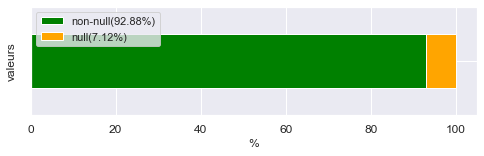

In [14]:
# Concat 2015 & 2016 data
# df = df15s
df = pd.concat([df15s, df16s], axis=0)

verifier_taille(df)
afficher_echantillon(df)

In [15]:
df[df['ComplianceStatus']=='Not Compliant']

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy
767,19798,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,33166,NaN,NaN,NaN,NaN,NaN,4,NORTHEAST,1977,1.0,3.0,Not Compliant,NaN,NaN
1346,21548,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,40086,NaN,NaN,NaN,NaN,NaN,7,MAGNOLIA / QUEEN ANNE,1967,1.0,4.0,Not Compliant,NaN,NaN
1838,23508,Multifamily LR (1-4),Low-Rise Multifamily,SEAVIEW CONDOMINIUM,53040,NaN,NaN,NaN,NaN,NaN,7,MAGNOLIA / QUEEN ANNE,1930,1.0,3.0,Not Compliant,NaN,NaN


In [16]:
df = df[df['ComplianceStatus']=='Compliant']
df = df.drop(columns=['ComplianceStatus'])
df

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,Hotel,88434.0,65.0,78.900000,249.43,7,DOWNTOWN,1927,1.0,12.0,NaN,6.977443e+06
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,Hotel,83880.0,51.0,94.400000,263.51,7,DOWNTOWN,1996,1.0,11.0,NaN,9.776630e+06
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,Hotel,757243.0,18.0,96.600000,2061.48,7,DOWNTOWN,1969,1.0,41.0,NaN,9.292823e+07
3,5,NonResidential,Hotel,HOTEL MAX,61320,Hotel,61320.0,1.0,460.400000,1936.34,7,DOWNTOWN,1926,1.0,10.0,High Outlier,2.823173e+07
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,Hotel,123445.0,67.0,120.100000,507.70,7,DOWNTOWN,1980,1.0,18.0,NaN,1.439879e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,Nonresidential COS,Other,High Point Community Center,18261,Other - Recreation,18261.0,NaN,51.000000,20.33,1,DELRIDGE NEIGHBORHOODS,1982,1.0,1.0,NaN,9.313110e+05
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,16000,Other - Recreation,16000.0,NaN,59.400002,32.17,2,DOWNTOWN,2004,1.0,1.0,NaN,9.504000e+05
3373,50224,Nonresidential COS,Other,Queen Anne Pool,13157,Other - Recreation,7583.0,NaN,438.200012,223.54,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,NaN,5.765398e+06
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,14101,Other - Recreation,6601.0,NaN,51.000000,22.11,1,GREATER DUWAMISH,1989,1.0,1.0,NaN,7.191510e+05


In [17]:
df[df['TotalEnergy'].isnull()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
62,87,SPS-District K-12,K-12 School,ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT),53352,K-12 School,53352.0,NaN,NaN,NaN,1,SOUTHWEST,1948,1.0,2.0,Low Outlier,NaN
719,19694,SPS-District K-12,K-12 School,MANN (SPS-DISTRICT),37327,K-12 School,41191.0,NaN,NaN,NaN,3,CENTRAL,1925,1.0,2.0,NaN,NaN
1358,21570,SPS-District K-12,K-12 School,PINEHURST ELEMENTARY (SPS-DISTRICT),34005,K-12 School,34005.0,NaN,NaN,NaN,5,NORTH,1950,1.0,1.0,NaN,NaN
1360,21578,SPS-District K-12,K-12 School,GENESEE SCHOOL (SPS-DISTRICT),41221,K-12 School,41221.0,NaN,NaN,NaN,1,SOUTHWEST,1949,1.0,1.0,Low Outlier,NaN
2108,24408,SPS-District K-12,K-12 School,WILSON-PACIFIC (SPS-DISTRICT),110830,K-12 School,110830.0,NaN,NaN,NaN,5,NORTHWEST,1953,1.0,1.0,NaN,NaN
2381,25361,SPS-District K-12,K-12 School,DECATUR ELEMENTARY (SPS-DISTRICT),43578,K-12 School,45370.0,NaN,NaN,NaN,4,NORTHEAST,1961,1.0,1.0,NaN,NaN
2406,25451,NonResidential,Restaurant\n,YALE STREET LANDING,26519,Restaurant,13592.0,NaN,NaN,NaN,3,LAKE UNION,1978,1.0,2.0,NaN,NaN


In [18]:
nans = valeurs_manquantes(df[['TotalEnergy',	'TotalEmission']])
nans

,TotalEnergy,TotalEmission
62,NaN,NaN
719,NaN,NaN
1358,NaN,NaN
1360,NaN,NaN
2108,NaN,NaN
2381,NaN,NaN
2406,NaN,NaN
1768,5.636544e+05,NaN
2321,7.715912e+05,NaN
2480,1.049490e+06,NaN


In [19]:
df = df.drop(index=nans.index)
valeurs_manquantes(df[['TotalEnergy',	'TotalEmission']])

,TotalEnergy,TotalEmission


In [20]:
nans = df[df['NumberofFloors'].isnull()]
nans

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
2015,24086,Campus,Other,KING COUNTY METRO TRANSIT ATLANTIC-CENTRAL BAS...,180796,Other,230970.0,NaN,129.6,818.66,2,GREATER DUWAMISH,1991,10.0,NaN,NaN,23431161.6
3171,40028,NonResidential,Non-Refrigerated Warehouse,"SAND POINT BUILDING 5A,5B,5C,5D",384772,Non-Refrigerated Warehouse,349953.0,65.0,37.2,406.74,4,NORTHEAST,1940,1.0,NaN,NaN,14313518.4
3172,40031,NonResidential,Medical Office,SAND POINT BUILDING 25,30287,Medical Office,31843.0,56.0,62.1,27.88,4,NORTHEAST,1960,1.0,NaN,NaN,1880822.7
3173,40034,NonResidential,Medical Office,SAND POINT BUILDING 29,21931,Medical Office,28000.0,21.0,133.3,137.63,4,NORTHEAST,1960,1.0,NaN,NaN,2923402.3
3193,43948,Nonresidential COS,Other,GEORGETOWN STEAM PLANT,39212,Other,39212.0,NaN,19.7,5.39,2,GREATER DUWAMISH,1906,1.0,NaN,NaN,772476.4
3209,49705,Nonresidential COS,Other,MAGNUSON PARK CAMPUS,502030,Other - Recreation,564258.0,NaN,30.6,472.56,4,NORTHEAST,1929,7.0,NaN,NaN,15362118.0
3311,49958,Nonresidential COS,Other,FIRST HILL STREET CAR MAINTENANCE,20993,"Repair Services (Vehicle, Shoe, Locksmith, etc)",20983.0,NaN,43.5,12.28,2,GREATER DUWAMISH,2014,1.0,NaN,NaN,913195.5
3313,49966,NonResidential,Other,SMILOW RAINIER VISTA BOYS & GIRLS CLUB,40265,Pre-school/Daycare,40265.0,NaN,48.6,42.40,2,SOUTHEAST,2009,1.0,NaN,NaN,1956879.0


In [21]:
df = df.drop(index=nans.index)
df[df['NumberofFloors'].isnull()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy


Le data set contient :
	- 6512 lignes et 17 colonnes.
	- 8283 valeurs manquantes, ce qui représente 7.48 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
2301,25086,Multifamily LR (1-4),Low-Rise Multifamily,ALOHA HOUSE APARTMENTS,48423,Multifamily Housing,43172.0,91.0,22.3,6.71,7,MAGNOLIA / QUEEN ANNE,1963,1.0,4.0,NaN,1.079833e+06
302,433,NonResidential,Retail Store,(71367A) SEATTLE Macy's,861702,Retail Store,509342.0,NaN,19.9,328.83,7,DOWNTOWN,1929,1.0,8.0,NaN,1.714787e+07


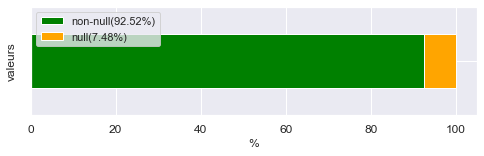

In [22]:
# Vérification de la structure du Data Set
verifier_taille(df)
afficher_echantillon(df)

In [23]:
nan_cols(df)

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,OSEBuildingID,0,0.00,6512,100.00
1,BuildingType,0,0.00,6512,100.00
2,PrimaryPropertyType,0,0.00,6512,100.00
3,PropertyName,0,0.00,6512,100.00
4,PropertyGFATotal,0,0.00,6512,100.00
5,LargestPropertyUseType,143,2.20,6369,97.80
6,LargestPropertyUseTypeGFA,143,2.20,6369,97.80
7,ENERGYSTARScore,1567,24.06,4945,75.94
8,SiteEUI(kBtu/sf),0,0.00,6512,100.00
9,TotalEmission,0,0.00,6512,100.00


In [24]:
valeurs_manquantes(df)

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,Hotel,88434.0,65.0,78.900000,249.43,7,DOWNTOWN,1927,1.0,12.0,NaN,6.977443e+06
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,Hotel,83880.0,51.0,94.400000,263.51,7,DOWNTOWN,1996,1.0,11.0,NaN,9.776630e+06
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,Hotel,757243.0,18.0,96.600000,2061.48,7,DOWNTOWN,1969,1.0,41.0,NaN,9.292823e+07
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,Hotel,123445.0,67.0,120.100000,507.70,7,DOWNTOWN,1980,1.0,18.0,NaN,1.439879e+07
5,9,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),97288,Police Station,88830.0,NaN,135.700000,304.62,7,DOWNTOWN,1999,1.0,2.0,NaN,1.320198e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,Nonresidential COS,Other,High Point Community Center,18261,Other - Recreation,18261.0,NaN,51.000000,20.33,1,DELRIDGE NEIGHBORHOODS,1982,1.0,1.0,NaN,9.313110e+05
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,16000,Other - Recreation,16000.0,NaN,59.400002,32.17,2,DOWNTOWN,2004,1.0,1.0,NaN,9.504000e+05
3373,50224,Nonresidential COS,Other,Queen Anne Pool,13157,Other - Recreation,7583.0,NaN,438.200012,223.54,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,NaN,5.765398e+06
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,14101,Other - Recreation,6601.0,NaN,51.000000,22.11,1,GREATER DUWAMISH,1989,1.0,1.0,NaN,7.191510e+05


# Analyse Explo

## Distributions

In [25]:
df.describe()

,OSEBuildingID,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,TotalEnergy
count,6512.000000,6.512000e+03,6.369000e+03,4945.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6.512000e+03
mean,20893.165848,9.330140e+04,7.710254e+04,67.586047,54.521698,115.884241,4.469748,1968.159859,1.070639,4.748618,5.962489e+06
std,11792.919532,1.893220e+05,1.697900e+05,27.064190,54.958068,485.142383,2.122136,33.051369,1.610970,5.534931,1.850516e+07
min,1.000000,1.128500e+04,5.656000e+03,1.000000,0.000000,-0.800000,1.000000,1900.000000,0.000000,0.000000,0.000000e+00
25%,19990.750000,2.837700e+04,2.498800e+04,52.000000,27.700001,9.467500,3.000000,1948.000000,1.000000,2.000000,9.760363e+05
50%,23071.000000,4.388400e+04,3.900000e+04,75.000000,38.300000,33.110000,4.000000,1974.000000,1.000000,4.000000,1.913294e+06
75%,25875.000000,9.000000e+04,7.412500e+04,90.000000,60.700000,91.500000,7.000000,1997.000000,1.000000,5.000000,4.699684e+06
max,50226.000000,9.320156e+06,9.320156e+06,100.000000,834.400024,16870.980000,7.000000,2015.000000,111.000000,99.000000,8.742307e+08


In [26]:
Cols = ['BuildingType', 'PropertyGFATotal',	'CouncilDistrictCode',	'YearBuilt', 'NumberofFloors' , 'PrimaryPropertyType', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',	'ENERGYSTARScore',	'TotalEnergy',	'TotalEmission']

Cols = ['PropertyGFATotal',	'CouncilDistrictCode',	'YearBuilt', 'NumberofFloors' , 'LargestPropertyUseTypeGFA',	'ENERGYSTARScore',	'TotalEnergy',	'TotalEmission']


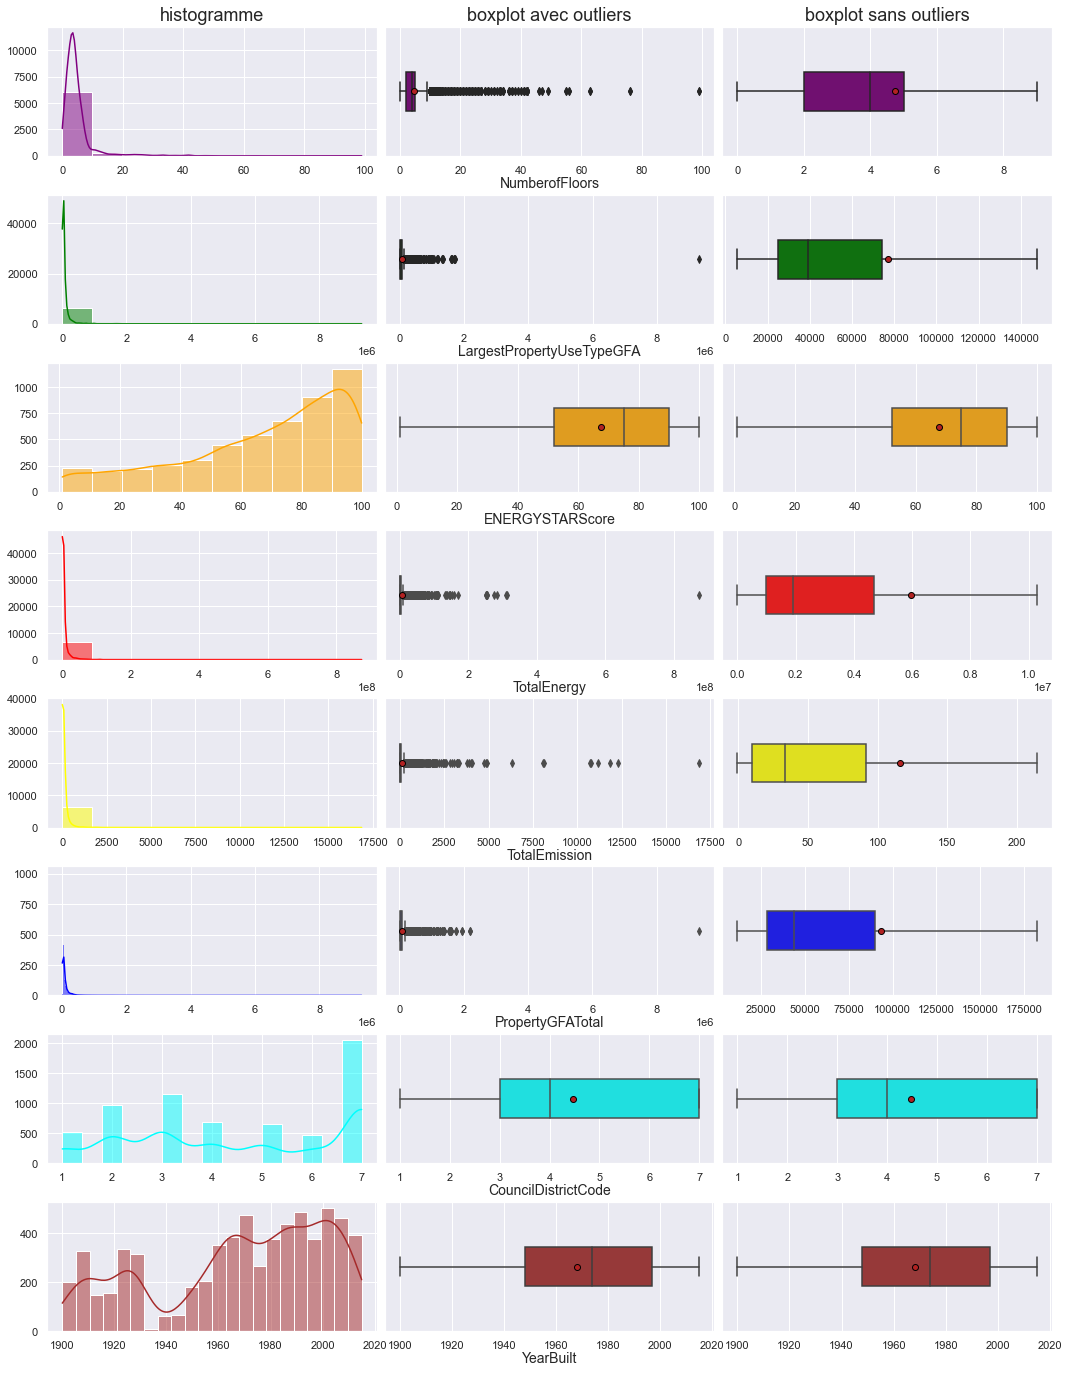

In [27]:
histo_distribution(df[Cols])

In [32]:
q3 = df['TotalEnergy'].quantile([0.75]).values[0]
q3

4699683.8

In [33]:
df = df[df['TotalEnergy']<q3]
df

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
22,28,SPS-District K-12,K-12 School,GRAHAM HILL ELEMENTARY SCHOOL (SPS-DISTRICT),56228,K-12 School,58320.0,96.0,25.100000,35.17,2,SOUTHEAST,1961,1.0,2.0,NaN,1.411323e+06
25,31,NonResidential,Other,SEATTLE HONDA,67224,Automobile Dealership,67224.0,NaN,20.700000,9.68,7,DOWNTOWN,1930,1.0,2.0,NaN,1.391537e+06
31,37,SPS-District K-12,K-12 School,JOHN HAY ELEMENTARY SCHOOL (SPS-DISTRICT),51582,K-12 School,55166.0,94.0,26.700000,10.27,7,MAGNOLIA / QUEEN ANNE,1989,1.0,2.0,NaN,1.377239e+06
34,41,NonResidential,Self-Storage Facility\n,QFC / SHURGARD MINI STORAGE / LIQUOR STORE,126394,Self-Storage Facility,26225.0,77.0,11.700000,3.71,4,NORTHEAST,1955,1.0,2.0,NaN,1.478810e+06
36,50,SPS-District K-12,K-12 School,LAWTON ELEMENTARY SCHOOL (SPS-DISTRICT),54986,K-12 School,54986.0,91.0,30.100000,28.78,7,MAGNOLIA / QUEEN ANNE,1990,1.0,2.0,NaN,1.655079e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,50219,Nonresidential COS,Mixed Use Property,Garfield Community Center,20050,Other - Recreation,8108.0,NaN,90.400002,60.81,3,CENTRAL,1994,1.0,1.0,NaN,1.812520e+06
3370,50221,Nonresidential COS,Other,High Point Community Center,18261,Other - Recreation,18261.0,NaN,51.000000,20.33,1,DELRIDGE NEIGHBORHOODS,1982,1.0,1.0,NaN,9.313110e+05
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,16000,Other - Recreation,16000.0,NaN,59.400002,32.17,2,DOWNTOWN,2004,1.0,1.0,NaN,9.504000e+05
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,14101,Other - Recreation,6601.0,NaN,51.000000,22.11,1,GREATER DUWAMISH,1989,1.0,1.0,NaN,7.191510e+05


## Correlations

In [34]:
# afficher_correlations(df[df['PrimaryPropertyType']=='Hospital'], variables=Cols)

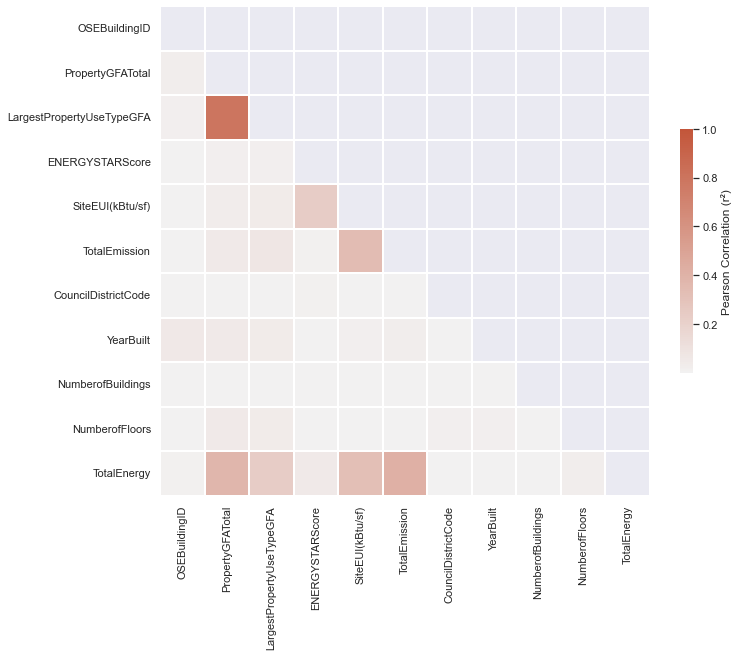

In [35]:
correlation_matrix(df)

## PCA

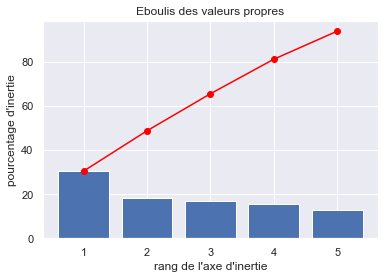

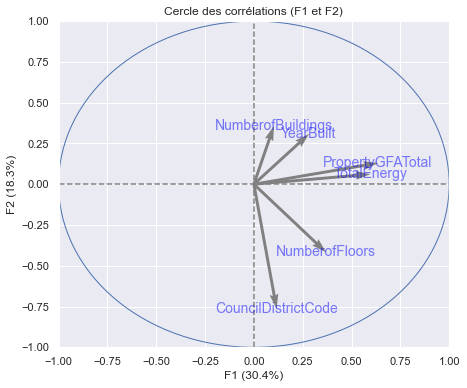

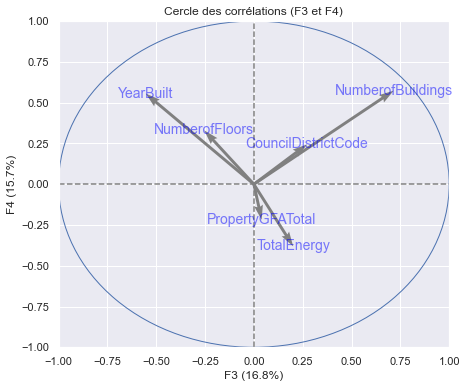

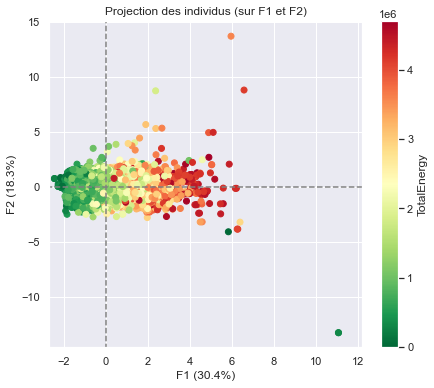

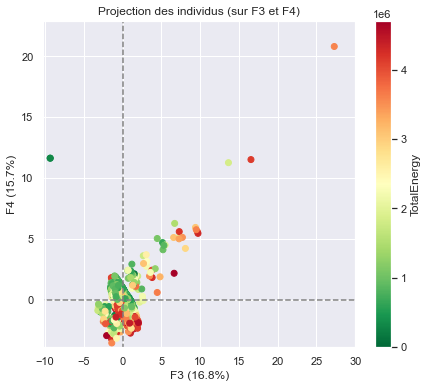

In [36]:
XCols = ['PropertyGFATotal', 'CouncilDistrictCode',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'TotalEnergy']
pcs = PCA(df[XCols], 5, continuous_illustrative_var=df['TotalEnergy'])

# Learning

In [37]:
df.shape

(4884, 17)

In [38]:
df2 = df[df['TotalEnergy']<=df['TotalEnergy'].median()]

In [39]:
XCols = ['PropertyGFATotal', 'CouncilDistrictCode',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'TotalEnergy']
y = 'TotalEnergy'
# X = MinMax_Scaled(df[XCols], frame=True)
X = df[XCols].sort_values(by=[y])

random_state = 0 #None

# X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state, scale='min-max', scale_y=True)
X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state, scale='min-max')
# X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state, scale='std')
# X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state)

In [40]:
valeurs_manquantes(X)

,PropertyGFATotal,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,TotalEnergy


In [41]:
print(len(X_train),len(X_test))

3907 977


In [42]:
X_train

array([[0.22356597, 1.        , 0.22608696, 0.1       , 0.1010101 ],
       [0.35195951, 0.        , 0.88695652, 0.1       , 0.04040404],
       [0.05735675, 0.66666667, 0.88695652, 0.1       , 0.01010101],
       ...,
       [0.10271051, 0.        , 0.59130435, 0.1       , 0.03030303],
       [0.13031263, 1.        , 0.79130435, 0.1       , 0.06060606],
       [0.04285548, 0.16666667, 0.80869565, 0.        , 0.03030303]])

In [43]:
y_train

array([3867949.     , 3305547.     ,  631361.5    , ...,  985454.4    ,
       1451639.8    , 1540080.06588])

In [44]:
y_train.std()

1080492.2922907218

## Baselines

RMSE : 1085488.13 RMSE(%) : 22.13
RMSLE : 0.73
R² : -0.00 RSE : 1.00


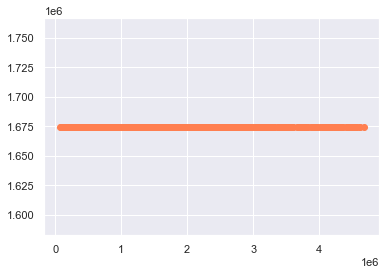

In [45]:
from sklearn import dummy, metrics
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train, y_train)
# Prédiction sur le jeu de test
y_pred = dum.predict(X_test)

# Evaluatation
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')


## Naive KNN Regressor

RMSE : 801239.42 RMSE(%) : 15.97
RMSLE : 0.55
R² : 0.46 RSE : 0.54


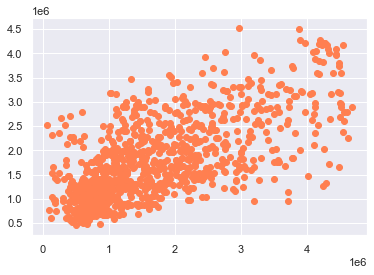

In [46]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

## Gram Matrix

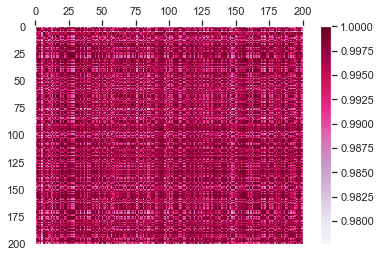

In [47]:
# Gram/K Matrix
from matplotlib import cm
kmatrix = metrics.pairwise.rbf_kernel(X_train, gamma=0.01)

kmatrix = kmatrix[:200, :200]

# dessiner la matrice
plt.pcolor(kmatrix, cmap=cm.PuRd) 

# rajouter la légende
plt.colorbar()

# retourner l'axe des ordonnées
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

# afficher l'image
plt.show()

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 4}
RMSE : 822530.45 RMSE(%) : 16.43
RMSLE : 0.56
R² : 0.43 RSE : 0.57


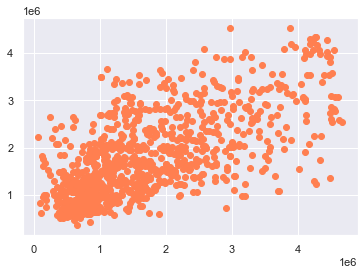

In [48]:
#-------------------------- GridSearchCV --------------------------
from sklearn import neighbors, model_selection

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':list(range(3,21))}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_mean_squared_log_error'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
regr = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score,   # score à optimiser
    n_jobs=-1
)

# Optimiser ce classifieur sur le jeu d'entraînement
regr.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(regr.best_params_)

y_pred = regr.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

## Kernal Ridge Regressor

RMSE : 822530.45 RMSE(%) : 16.43
RMSLE : 0.56
R² : 0.43 RSE : 0.57


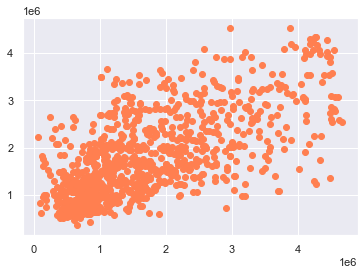

In [49]:
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

## Neural Net Regressor

RMSE : 836355.15 RMSE(%) : 16.73
RMSLE : 0.59
R² : 0.41 RSE : 0.59


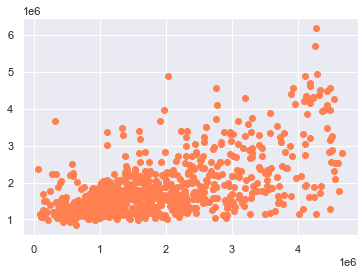

In [50]:
from sklearn.neural_network import MLPRegressor

nnr = MLPRegressor(random_state=1, hidden_layer_sizes=(15, 10, 5,), max_iter=5000)

nnr.fit(X_train, y_train)
y_pred = nnr.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

In [ ]:
# # Fixer les valeurs des hyperparamètres à tester
# param_grid = {'max_iter': np.arange(1000, 3000, 1000), 'alpha': 10.0 ** -np.arange(1, 7), 'random_state':np.arange(4), 'hidden_layer_sizes':[(20, 15, 10, 5,),(15, 10, 5,)]}

# # Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
# score = 'neg_mean_squared_log_error'

# # Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
# regr = model_selection.GridSearchCV(
#     MLPRegressor(), # un classifieur kNN
#     param_grid,     # hyperparamètres à tester
#     cv=5,           # nombre de folds de validation croisée
#     scoring=score,   # score à optimiser
#     n_jobs=-1
# )

# # Optimiser ce classifieur sur le jeu d'entraînement
# regr.fit(X_train, y_train)

# # Afficher le(s) hyperparamètre(s) optimaux
# print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
# print(regr.best_params_)

# y_pred = regr.predict(X_test)

# print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
# print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
# print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
# plt.scatter(y_test, y_pred, color='coral')